# Lorenzo Lanzini Exercises 3
## Exercise 03.1

This exercise consists in computing via Monte Carlo the European CALL-OPTION price $C[S(0), 0]$ and PUT-OPTION price $P[S(0), 0]$.

Here all the values of parameters needed for the calculation:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

I calculate them in two different ways:
1. <span style="color:black"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$:

$$S(T) = S(0)e^{(r-\frac{\sigma ^2}{2})T + \sigma Z_i \sqrt{T}},\;\;\; where\;\;\; Z_i \sim N(0, 1)$$

2. <span style="color:black"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

$$S(t_i) = S(t_{i-1})e^{(r-\frac{\sigma ^2}{2})(t_i-t_{i-1}) + \sigma Z_i \sqrt{(t_i-t_{i-1})}},\;\;\; where\;\;\; Z_i \sim N(0, 1)\;\; and\; \; i=1,..,m$$

and therefore $$S(T)=S(t_m)$$

I introduce a variable **profit**, which assumes different expressions for CALL and PUT options:

- **CALL:** **profit** is equal to zero if $ S(T) < K$. This corresponds to the situation when the holder takes no advantage in purchasing from the writer. Otherwise, **profit** is equal to $S(T) - K$;
- **PUT:** **profit** is equal to zero if $ S(T) > K$. This corresponds to the situation when the holder takes no advantage in selling to the writer. Otherwise, **profit** is equal to $K - S(T)$.
I repeat the simulation 1000 times to calculate **profit** average. The option-price is
$$C/P [S(0), 0] = e^{-rT}\langle profit \rangle$$

I repeat the calculation of the price 10000 times and I compute progressive uncertainty using data blocking (Nblocks = 100).
The following results are the values obtained for prices compared to Black-Scholes analytic solution. 

### CALL-OPTION

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

In [2]:
f1=open("call1.txt", "r")
f2=open("call2.txt", "r")
f3=open("put1.txt", "r")
f4=open("put2.txt", "r")

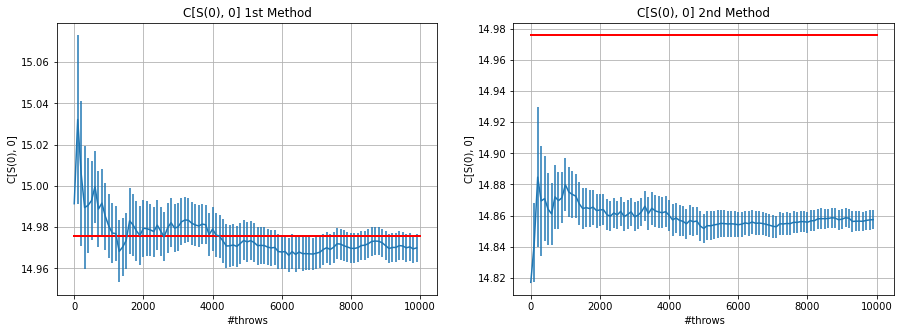

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
n_min=1
n_max=10000
# Black-Scholes analytic solution
n_array=np.array([
    int(x)
    for x in np.geomspace(n_min, n_max, num=1000)
])
Theory=np.array([
    14.975790778311286
    for x in np.geomspace(n_min, n_max, num=1000) 
])
ax1.plot(n_array, Theory, color="Red", linewidth=2)
x, call1, error= np.loadtxt("call1.txt", usecols=(0, 1, 2), delimiter=' ', unpack='true') 
ax1.errorbar(x, call1, error)
ax1.set_xlabel('#throws')
ax1.set_ylabel('C[S(0), 0]')
ax1.grid(True)
ax1.set_title('C[S(0), 0] 1st Method')



ax2.plot(n_array, Theory, color = "Red", linewidth=2)
throws, call2, error_call2= np.loadtxt("call2.txt", usecols=(0, 1, 2), delimiter=' ', unpack='true') 
ax2.errorbar(throws, call2, error_call2)
ax2.set_xlabel('#throws')
ax2.set_ylabel('C[S(0), 0]')
ax2.set_title('C[S(0), 0] 2nd Method')
ax2.grid(True)


I obtain this strange behaviour for the second method. My results are not compatible with analytic solution within several $\sigma$.

### PUT OPTION

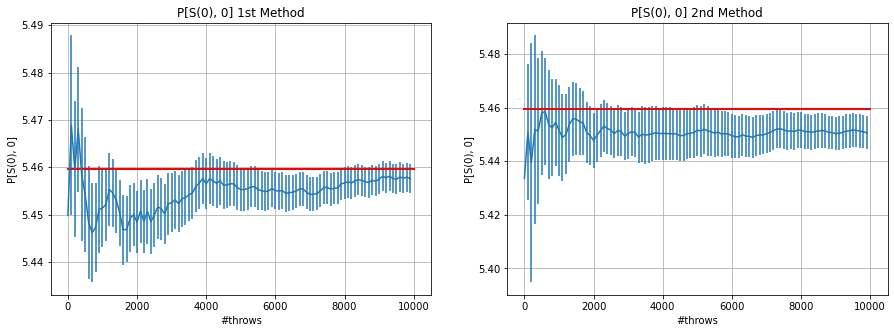

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
n_min=1
n_max=10000
# Black-Scholes analytic solution
n_array=np.array([
    int(x)
    for x in np.geomspace(n_min, n_max, num=1000)
])
Theory=np.array([
    5.4595325819072364
    for x in np.geomspace(n_min, n_max, num=1000) 
])
ax1.plot(n_array, Theory, color="Red", linewidth=2)
x, put1, error= np.loadtxt("put1.txt", usecols=(0, 1, 2), delimiter=' ', unpack='true') 
ax1.errorbar(x, put1, error)
ax1.set_xlabel('#throws')
ax1.set_ylabel('P[S(0), 0]')
ax1.grid(True)
ax1.set_title('P[S(0), 0] 1st Method')



ax2.plot(n_array, Theory, color = "Red", linewidth=2)
throws, put2, error_put2= np.loadtxt("put2.txt", usecols=(0, 1, 2), delimiter=' ', unpack='true') 
ax2.errorbar(throws, put2, error_call2)
ax2.set_xlabel('#throws')
ax2.set_ylabel('P[S(0), 0]')
ax2.set_title('P[S(0), 0] 2nd Method')
ax2.grid(True)